> This notebook is built after tutorial from <a href="https://docs.omnetpp.org/tutorials/pandas/">OMNeT++</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [19]:
subprocess.run('scavetool x -o aloha/aloha.csv aloha/*.sca aloha/*.vec', shell=True)

CompletedProcess(args='scavetool x -o aloha/aloha.csv aloha/*.sca aloha/*.vec', returncode=0)

In [20]:
aloha = pd.read_csv('aloha/aloha.csv')
aloha.head()

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues,vectime,vecvalue
0,PureAlohaExperiment-0-20170627-20:42:16-22739,runattr,NaN,NaN,configname,PureAlohaExperiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PureAlohaExperiment-0-20170627-20:42:16-22739,runattr,NaN,NaN,datetime,20170627-20:42:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PureAlohaExperiment-0-20170627-20:42:16-22739,runattr,NaN,NaN,experiment,PureAlohaExperiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PureAlohaExperiment-0-20170627-20:42:16-22739,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PureAlohaExperiment-0-20170627-20:42:16-22739,runattr,NaN,NaN,iterationvars,"numHosts=10, iaMean=1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
aloha.module.describe()

count             1012
unique              11
top       Aloha.server
freq               932
Name: module, dtype: object

In [22]:
aloha.module.unique()

array([nan, 'Aloha.server', 'Aloha.host[0]', 'Aloha.host[1]',
       'Aloha.host[2]', 'Aloha.host[3]', 'Aloha.host[4]', 'Aloha.host[5]',
       'Aloha.host[6]', 'Aloha.host[7]', 'Aloha.host[8]', 'Aloha.host[9]'],
      dtype=object)

In [23]:
aloha.dtypes

run            object
type           object
module         object
name           object
attrname       object
attrvalue      object
value         float64
count         float64
sumweights    float64
mean          float64
stddev        float64
min           float64
max           float64
binedges       object
binvalues      object
vectime        object
vecvalue       object
dtype: object

In [24]:
aloha.describe()

,value,count,sumweights,mean,stddev,min,max
count,294.000000,84.000000,0.0,84.000000,84.000000,84.000000,84.000000
mean,4900.038749,5591.380952,NaN,1.489369,0.599396,1.049606,6.560987
std,11284.077075,4528.796760,NaN,1.530455,0.962515,0.956102,9.774404
min,0.045582,470.000000,NaN,0.152142,0.031326,0.099167,0.272013
25%,0.192537,1803.000000,NaN,0.164796,0.049552,0.099186,0.498441
50%,668.925298,4065.500000,NaN,1.197140,0.243035,1.049776,3.084077
75%,5400.000000,8815.000000,NaN,2.384397,0.741081,2.000000,9.000000
max,95630.000000,14769.000000,NaN,6.936747,5.323887,2.000000,54.000000


In [32]:
#
# Adding a column qname:
#
aloha = aloha.assign(qname = aloha.module + '.' + aloha.name)
aloha[aloha.type=='scalar'].head()

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues,vectime,vecvalue,qname
1176,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server,duration,NaN,NaN,5400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloha.server.duration
1177,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server,collisionLength:mean,NaN,NaN,0.198275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloha.server.collisionLength:mean
1179,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server,collisionLength:sum,NaN,NaN,2457.026781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloha.server.collisionLength:sum
1181,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server,collisionLength:max,NaN,NaN,0.901897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloha.server.collisionLength:max
1183,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server,collidedFrames:last,NaN,NaN,40805.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloha.server.collidedFrames:last


In [33]:
#
# Removing a column:
#
del aloha['qname']

In [36]:
#
# Since different rows may contain values of various types in some columns, we need
# a more advanced way of loading the data. We will use these two helpers:
#
def parse_if_number(s):
    try:
        return float(s)
    except:
        return True if s == 'true' else False if s == 'false' else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

In [38]:
#
# Now we read CSV with parsing vectors where possible and casting 'attrvalue' column to
# the appropriate type:
#
aloha = pd.read_csv('aloha/aloha.csv', converters={
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray,
})

In [39]:
#
# We also inspect all available types:
#
aloha['type'].unique()

array(['runattr', 'itervar', 'param', 'scalar', 'attr', 'histogram',
       'vector'], dtype=object)

## 7. Plotting scalars

Scalars can serve as input for many different kinds of plots. Here we'll show how one can create a "throughput versus offered load" type plot. We will plot the channel utilization in the Aloha model in the function of the packet generation frequency. Channel utilization is also affected by the number of hosts in the network -- we want results belonging to the same number of hosts to form iso lines. Packet generation frequency and the number of hosts are present in the results as iteration variables named `iaMean` and `numHosts`; channel utilization values are the `channelUtilization:last` scalars saved by the `Aloha.server` module. The data contains the results from two simulation runs for each (iaMean, numHosts) pair done with different seeds; we want to average them for the plot.

The first few steps are fairly straightforward. We only need the scalars and the iteration variables from the data frame, so we filter out the rest. Then we create a `qname` column from other columns to hold the names of our variables: the names of scalars are in the `module` and `name` columns (we want to join them with a dot), and the names of iteration variables are in the `attrname` column. Since attrname is not filled in for scalar rows, we can take `attrname` as `qname` first, then fill in the holes with `module.name`. We use the `combine_first()` method for that: `a.combine_first(b)` fills the holes in `a` using the corresponding values from `b`.

The similar issue arises with values: values of output scalars are in the `value` column, while that of iteration variables are in the `attrvalue` column. Since `attrvalue` is unfilled for scalar rows, we can again utilize `combine_first()` to merge two. There is one more catch: we need to change the `dtype` of the `attrvalue` to `float64`, otherwise the resulting `value` column also becomes object dtype. (Luckily, all our iteration variables are numeric, so the `dtype` conversion is possible. In other simulations that contain non-numeric itervars, one needs to filter those out, force them into numeric values somehow, or find some other trick to make things work.)

In [41]:
scalars = aloha[(aloha.type == 'scalar') | (aloha.type == 'itervar')]  # filter rows
scalars = scalars.assign(qname = scalars.attrname.combine_first(scalars.module + '.' + scalars.name))
scalars.value = scalars.value.combine_first(scalars.attrvalue.astype('float64'))
scalars[['run', 'type', 'qname', 'value', 'module', 'name', 'attrname']].iloc[80:90]

,run,type,qname,value,module,name,attrname
1134,PureAlohaExperiment-40-20170627-20:42:22-22773,itervar,iaMean,9.000000,NaN,NaN,iaMean
1135,PureAlohaExperiment-40-20170627-20:42:22-22773,itervar,numHosts,20.000000,NaN,NaN,numHosts
1162,PureAlohaExperiment-41-20170627-20:42:22-22773,itervar,iaMean,9.000000,NaN,NaN,iaMean
1163,PureAlohaExperiment-41-20170627-20:42:22-22773,itervar,numHosts,20.000000,NaN,NaN,numHosts
1176,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server.duration,5400.000000,Aloha.server,duration,NaN
1177,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server.collisionLength:mean,0.198275,Aloha.server,collisionLength:mean,NaN
1179,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server.collisionLength:sum,2457.026781,Aloha.server,collisionLength:sum,NaN
1181,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server.collisionLength:max,0.901897,Aloha.server,collisionLength:max,NaN
1183,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server.collidedFrames:last,40805.000000,Aloha.server,collidedFrames:last,NaN
1186,PureAlohaExperiment-0-20170627-20:42:16-22739,scalar,Aloha.server.channelUtilization:last,0.156057,Aloha.server,channelUtilization:last,NaN


To work further, it would be very convenient if we had a format where each simulation run corresponds to one row, and all variables produced by that run had their own columns. We can call it the wide format, and it can be produced using the `pivot()` method:

In [43]:
scalars_wide = scalars.pivot('run', columns='qname', values='value')
scalars_wide.head()

qname,Aloha.server.channelUtilization:last,Aloha.server.collidedFrames:last,Aloha.server.collisionLength:max,Aloha.server.collisionLength:mean,Aloha.server.collisionLength:sum,Aloha.server.duration,Aloha.server.receivedFrames:last,iaMean,numHosts
run,,,,,,,,,
PureAlohaExperiment-0-20170627-20:42:16-22739,0.156057,40805.0,0.901897,0.198275,2457.026781,5400.0,8496.0,1.0,10.0
PureAlohaExperiment-1-20170627-20:42:17-22739,0.156176,40692.0,0.958902,0.198088,2456.494983,5400.0,8503.0,1.0,10.0
PureAlohaExperiment-10-20170627-20:42:16-22741,0.109571,1760.0,0.326138,0.155154,126.450220,5400.0,5965.0,7.0,10.0
PureAlohaExperiment-11-20170627-20:42:16-22741,0.108992,1718.0,0.340096,0.154529,125.477252,5400.0,5934.0,7.0,10.0
PureAlohaExperiment-12-20170627-20:42:16-22741,0.090485,1069.0,0.272013,0.152142,78.201174,5400.0,4926.0,9.0,10.0


We are interested in only three columns for our plot:

In [44]:
scalars_wide[['numHosts', 'iaMean', 'Aloha.server.channelUtilization:last']].head()

qname,numHosts,iaMean,Aloha.server.channelUtilization:last
run,,,
PureAlohaExperiment-0-20170627-20:42:16-22739,10.0,1.0,0.156057
PureAlohaExperiment-1-20170627-20:42:17-22739,10.0,1.0,0.156176
PureAlohaExperiment-10-20170627-20:42:16-22741,10.0,7.0,0.109571
PureAlohaExperiment-11-20170627-20:42:16-22741,10.0,7.0,0.108992
PureAlohaExperiment-12-20170627-20:42:16-22741,10.0,9.0,0.090485


Since we have our x and y data in separate columns now, we can utilize the scatter plot feature of the data frame for plotting it:

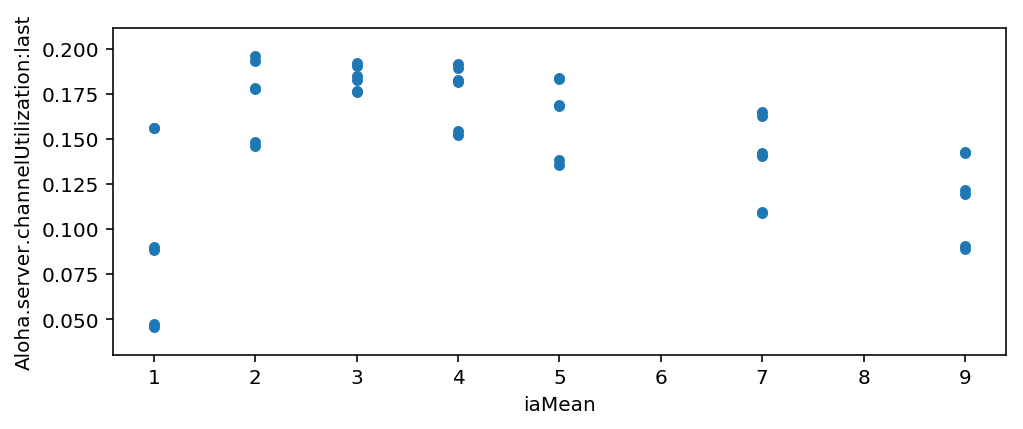

In [45]:
# set the default image resolution and size
plt.rcParams['figure.figsize'] = [8.0, 3.0]
plt.rcParams['figure.dpi'] = 144
# create a scatter plot
scalars_wide.plot.scatter('iaMean', 'Aloha.server.channelUtilization:last')
plt.show()

NOTE: Although `plt.show()` is not needed in Jupyter (`%matplotlib inline` turns on immediate display), we'll continue to include it in further code fragments, so that they work without change when you use another Python shell.

The resulting chart looks quite good as the first attempt. However, it has some shortcomings:

- Dots are not connected. The dots that have the same `numHosts` value should be connected with iso lines.
- As the result of having two simulation runs for each (`iaMean`,`numHosts`) pair, the dots appear in pairs. We'd like to see their averages instead.

Unfortunately, scatter plot can only take us this far, we need to look for another way.

What we really need as chart input is a table where rows correspond to different `iaMean` values, columns correspond to different `numHosts` values, and cells contain channel utilization values (the average of the repetitions). Such table can be produced from the "wide format" with another pivoting operation. We use `pivot_table()`, a cousin of the `pivot()` method we've seen above. The difference between them is that `pivot()` is a reshaping operation (it just rearranges elements), while `pivot_table()` is more of a spreadsheet-style pivot table creation operation, and primarily intended for numerical data. `pivot_table()` accepts an aggregation function with the default being `mean`, which is quite convenient for us now (we want to average channel utilization over repetitions.)

In [46]:
aloha_pivot = scalars_wide.pivot_table(
    index='iaMean', 
    columns='numHosts', 
    values='Aloha.server.channelUtilization:last'
)  # note: aggregation function = mean (that's the default)
aloha_pivot.head()

numHosts,10.0,15.0,20.0
iaMean,,,
1.0,0.156116,0.089539,0.046586
2.0,0.194817,0.178159,0.147564
3.0,0.176321,0.191571,0.183976
4.0,0.153569,0.182324,0.190452
5.0,0.136997,0.168780,0.183742


Note that rows correspond to various `iaMean` values (`iaMean` serves as index); there is one column for each value of `numHosts`; and that data in the table are the averages of the channel utilizations produced by the simulations performed with the respective `iaMean` and `numHosts` values.

For the plot, every column should generate a separate line (with the x values coming from the index column, `iaMean`) labelled with the column name. The basic Matplotlib interface cannot create such plot in one step. However, the Pandas data frame itself has a plotting interface which knows how to interpret the data, and produces the correct plot without much convincing:

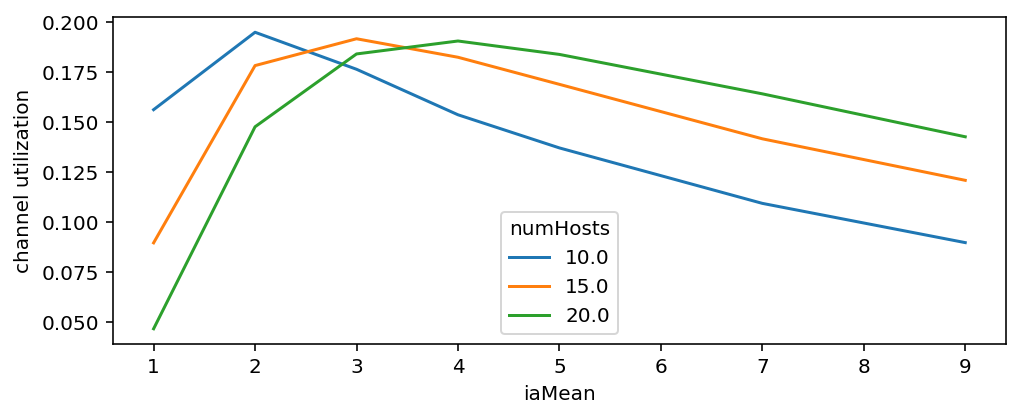

In [47]:
aloha_pivot.plot.line()
plt.ylabel('channel utilization')
plt.show()

## 8. Interactive pivot tables

Getting the pivot table right is not always easy, so having a GUI where one can drag columns around and immediately see the result is definitely a blessing. Pivottable.js presents such a GUI inside a browser, and although the bulk of the code is Javascript, it has a Python frond-end that integrates nicely with Jupyter. Let's try it!

In [48]:
import pivottablejs as pj

In [49]:
pj.pivot_ui(scalars_wide)

An interactive panel containing the pivot table will appear. Here is how you can reproduce the above "Channel utilization vs iaMean" plot in it:

1. Drag numHosts to the "rows" area of the pivot table. The table itself is the area on the left that initially only displays "Totals | 42", and the "rows" area is the empty rectangle directly of left it. The table should show have two columns (`numHosts` and `Totals`) and five rows in total after dragging.
2. Drag `iaMean` to the "columns" area (above the table). Columns for each value of `iaMean` should appear in the table.
3. Near the top-left corner of the table, select *Average* from the combo box that originally displays *Count*, and select `ChannelUtilization:last` from the combo box that appears below it.
4. In the top-left corner of the panel, select *Line Chart* from the combo box that originally displays *Table*.

If you can't get to see it, the following command will programmatically configure the pivot table in the appropriate way:

In [50]:
pj.pivot_ui(
    scalars_wide, 
    rows=['numHosts'], 
    cols=['iaMean'], 
    vals=['Aloha.server.channelUtilization:last'], 
    aggregatorName='Average', 
    rendererName='Line Chart'
)

If you want experiment with Excel's or LibreOffice's built-in pivot table functionality, the data frame's `to_clipboard()` and `to_csv()` methods will help you transfer the data. For example, you can issue the `scalars_wide.to_clipboard()` command to put the data on the clipboard, then paste it into the spreadsheet. Alternatively, type print(`scalars_wide.to_csv()`) to print the data in CSV format that you can select and then copy/paste. Or, use `scalars_wide.to_csv("scalars.csv")` to save the data into a file which you can import.

## 9. Plotting histograms

In this section we explore how to plot histograms recorded by the simulation. Histograms are in rows that have `"histogram"` in the `type` column. Histogram bin edges and bin values (counts) are in the `binedges` and `binvalues` columns as NumPy array objects (`ndarray`).

Let us begin by selecting the histograms into a new data frame for convenience.

In [51]:
histograms = aloha[aloha.type=='histogram']
len(histograms)

84

We have 84 histograms. It makes no sense to plot so many histograms on one chart, so let's just take one on them, and examine its content.

In [52]:
hist = histograms.iloc[0]
hist.binedges, hist.binvalues

(array([-0.11602833, -0.08732314, -0.05861794, -0.02991275, -0.00120756,
         0.02749763,  0.05620283,  0.08490802,  0.11361321,  0.1423184 ,
         0.1710236 ,  0.19972879,  0.22843398,  0.25713917,  0.28584437,
         0.31454956,  0.34325475,  0.37195994,  0.40066514,  0.42937033,
         0.45807552,  0.48678071,  0.51548591,  0.5441911 ,  0.57289629,
         0.60160148,  0.63030668,  0.65901187,  0.68771706,  0.71642225,
         0.74512745]),
 array([   0.,    0.,    0.,    0.,    0.,    0.,    0., 1234., 2372.,
        2180., 2115., 1212.,  917.,  663.,  473.,  353.,  251.,  186.,
         123.,   99.,   60.,   44.,   31.,   25.,   15.,   13.,    9.,
           3.,    5.,    3.]))

The easiest way to plot the histogram from these two arrays is to look at it as a step function, and create a line plot with the appropriate drawing style. The only caveat is that we need to add an extra 0 element to draw the right side of the last histogram bin.

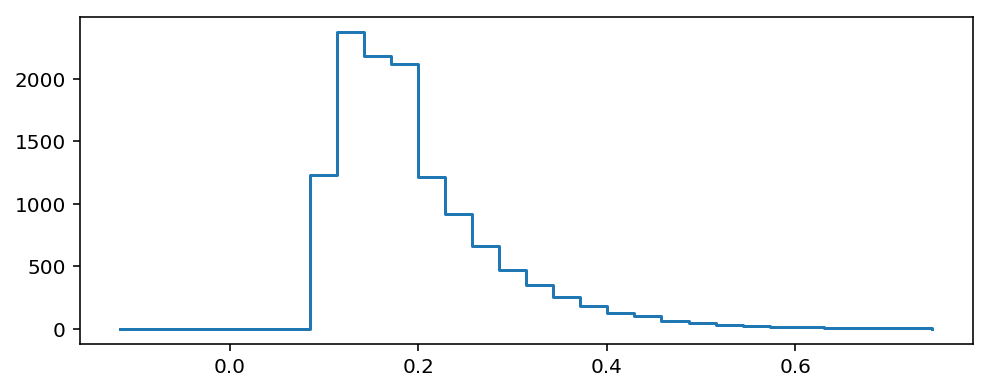

In [53]:
plt.plot(hist.binedges, np.append(hist.binvalues, 0), drawstyle='steps-post')
plt.show()

Another way to plot a recorded histogram is Matplotlib's `hist()` method, although that is a bit tricky. Instead of taking histogram data, `hist()` insists on computing the histogram itself from an array of values -- but we only have the histogram, and not the data it was originally computed from. Fortunately, `hist()` can accept a bin edges array, and another array as weights for the values. Thus, we can trick it into doing what we want by passing in our `binedges` array twice, once as bin edges and once as values, and specifying `binvalues` as weights.

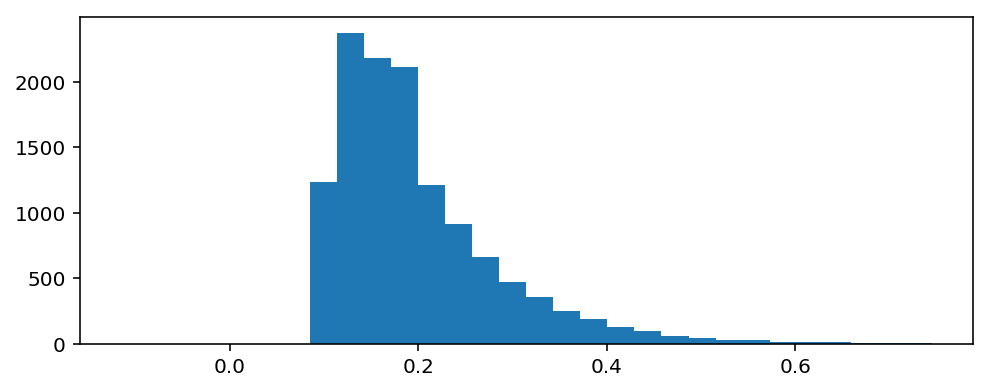

In [54]:
plt.hist(bins=hist.binedges, x=hist.binedges[:-1], weights=hist.binvalues)
plt.show()

`hist()` has some interesting options. For example, we can change the plotting style to be similar to a line plot by setting `histtype='step'`. To plot the normalized version of the histogram, specify `normed=True` or `density=True` (they work differently; see the Matplotlib documentation for details). To draw the cumulative density function, also specify `cumulative=True`. The following plot shows the effect of some of these options.

/Users/andrey/.virtualenvs/omnet/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


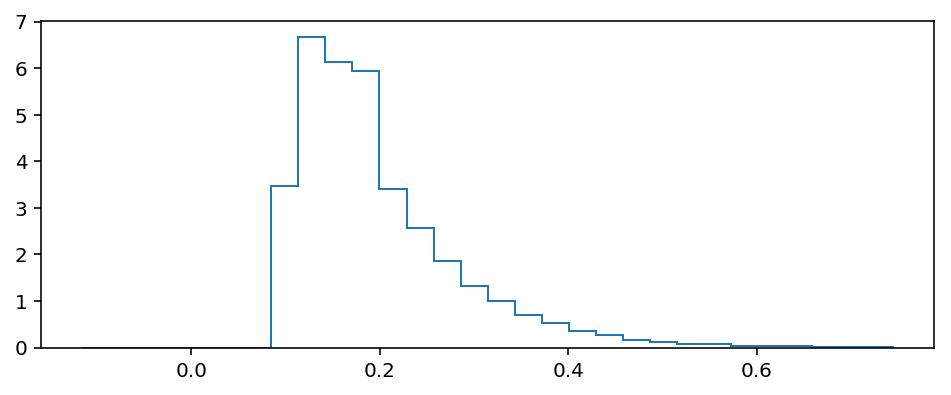

In [55]:
plt.hist(bins=hist.binedges, x=hist.binedges[:-1], weights=hist.binvalues, histtype='step', normed=True)
plt.show()

To plot several histograms, we can iterate over the histograms and draw them one by one on the same plot. The following code does that, and also adds a legend and adjusts the bounds of the x axis.

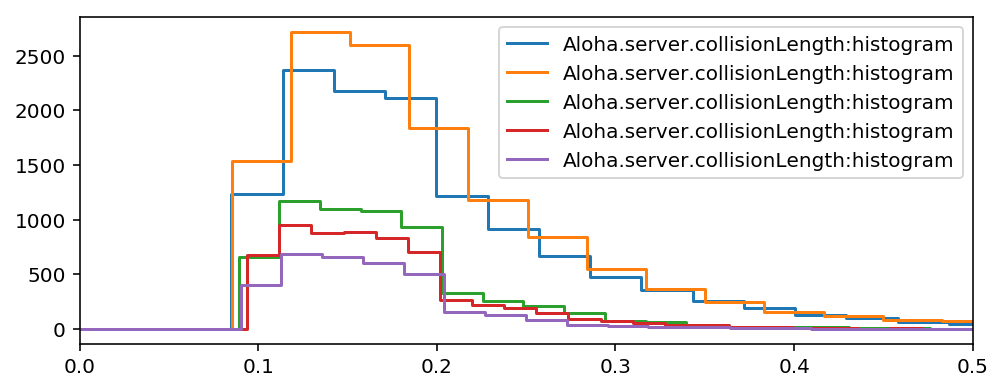

In [57]:
somehistograms = histograms[histograms.name == 'collisionLength:histogram'][:5]
for row in somehistograms.itertuples():
    plt.plot(row.binedges, np.append(row.binvalues, 0), drawstyle='steps-post')
plt.legend(somehistograms.module + '.' + somehistograms.name)
plt.xlim(0, 0.5)
plt.show()

Note, however, that the legend contains the same string for all histograms, which is not very meaningful. We could improve that by including some characteristics of the simulation that generated them, i.e. the number of hosts (`numHosts` iteration variable) and frame interarrival times (`iaTime` iteration variable). We'll see in the next section how that can be achieved.

## 11. Plotting vectors

This section deals with basic plotting of output vectors. Output vectors are basically time series data, but values have timestamps instead of being evenly spaced. Vectors are in rows that have "vector" in the type column. The values and their timestamps are in the vecvalue and vectime columns as NumPy array objects (`ndarray`).

We'll use a different data set for exploring output vector plotting, one from the routing example simulation. There are pre-recorded result files in the `samples/resultfiles/routing` directory; change into it in the terminal, and issue the following command to convert them to CSV:

In [58]:
subprocess.run('scavetool x -o routing.csv routing/*.vec', shell=True)

CompletedProcess(args='scavetool x -o routing.csv routing/*.vec', returncode=0)

Then we read the the CSV file into a data frame in the same way we saw with the *aloha* dataset:

In [59]:
routing = pd.read_csv('routing.csv', converters={
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray,
})

Let us begin by selecting the vectors into a new data frame for convenience.

In [60]:
vectors = routing[routing.type == 'vector']
len(vectors)

51

Our data frame contains results from one run. To get some idea what vectors we have, let's print the list unique vector names and module names:

In [61]:
vectors.name.unique(), vectors.module.unique()

(array(['qlen:vector', 'busy:vector', 'txBytes:vector',
        'endToEndDelay:vector', 'hopCount:vector', 'sourceAddress:vector',
        'rxBytes:vector', 'drop:vector'], dtype=object),
 array(['Net5.rte[0].queue[0]', 'Net5.rte[0].queue[1]',
        'Net5.rte[1].queue[0]', 'Net5.rte[1].queue[1]',
        'Net5.rte[1].queue[2]', 'Net5.rte[2].queue[0]',
        'Net5.rte[2].queue[1]', 'Net5.rte[2].queue[2]',
        'Net5.rte[2].queue[3]', 'Net5.rte[3].queue[0]',
        'Net5.rte[3].queue[1]', 'Net5.rte[3].queue[2]',
        'Net5.rte[4].queue[0]', 'Net5.rte[4].queue[1]', 'Net5.rte[4].app',
        'Net5.rte[1].app'], dtype=object))

A vector can be plotted on a line chart by simply passing the `vectime` and `vecvalue` arrays to `plt.plot()`:

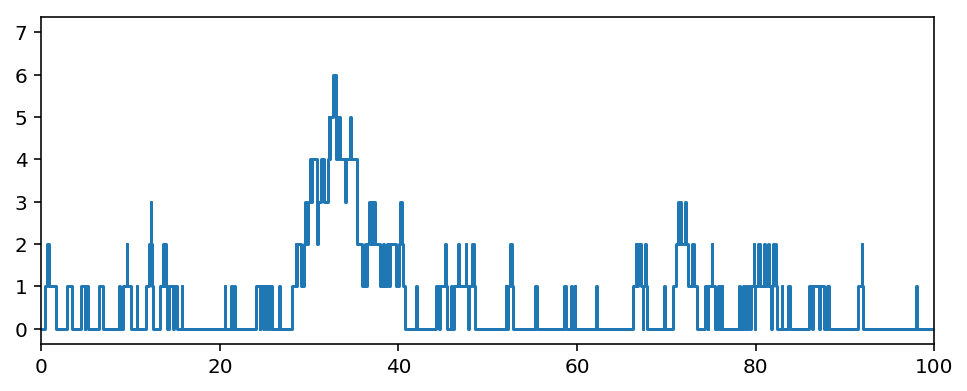

In [63]:
vec = vectors[vectors.name == 'qlen:vector'].iloc[4]
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xlim(0, 100)
plt.show()

When several vectors need to be placed on the same plot, one can simply use a for loop.

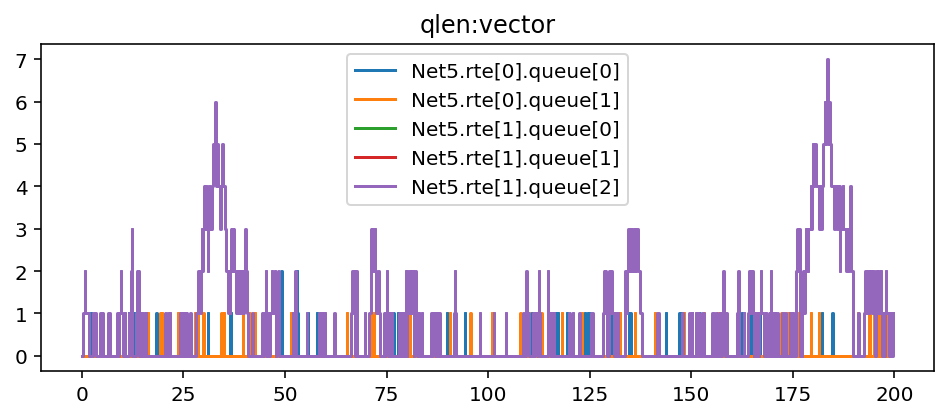

In [66]:
somevectors = vectors[vectors.name == 'qlen:vector'][:5]
for row in somevectors.itertuples():
    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')
plt.title(somevectors.name.values[0])
plt.legend(somevectors.module)
plt.show()

## 12. Vector Filtering

Plotting vectors "as is" is often not practical, as the result will be a crowded plot that's difficult to draw conclusions from. To remedy that, one can apply some kind of filtering before plotting, or plot a derived quantity such as the integral, sum or running average instead of the original. Such things can easily be achieved with the help of NumPy.

Vector time and value are already stored in the data frame as NumPy arrays (`ndarray`), so we can apply NumPy functions to them. For example, let's try `np.cumsum()` which computes cumulative sum:

In [77]:
x = np.array([8, 2, 1, 5, 7])
np.cumsum(x)

array([ 8, 10, 11, 16, 23])

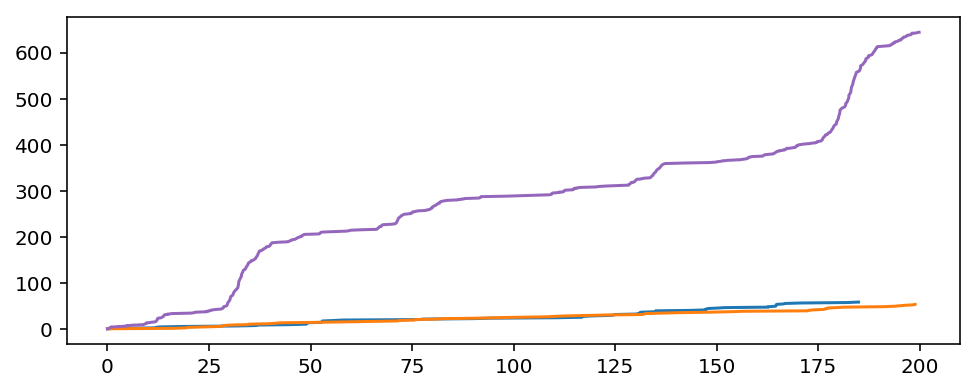

In [78]:
for row in somevectors.itertuples():
    plt.plot(row.vectime, np.cumsum(row.vecvalue))
plt.show()

Plotting cumulative sum against time might be useful e.g. for an output vector where the simulation emits the packet length for each packet that has arrived at its destination. There, the sum would represent "total bytes received".

Plotting the count against time for the same output vector would represent "number of packets received". For such a plot, we can utilize `np.arange(1,n)` which simply returns the numbers 1, 2, .., n-1 as an array:

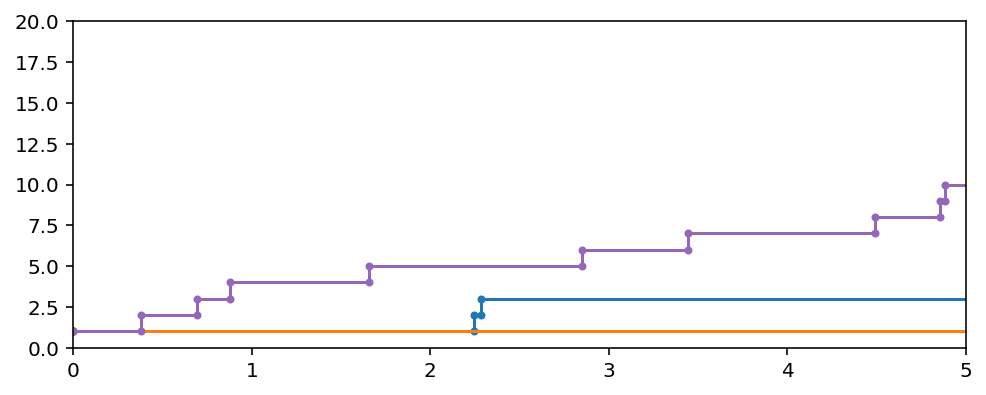

In [79]:
for row in somevectors.itertuples():
    plt.plot(row.vectime, np.arange(1, row.vecvalue.size + 1), '.-', drawstyle='steps-post')
plt.xlim(0, 5)
plt.ylim(0, 20)
plt.show()

Note that we changed the plotting style to "steps-post", so that for any t time the plot accurately represents the number of values whose timestamp is less than or equal to t.

As another warm-up exercise, let's plot the time interval that elapses between adjacent values; that is, for each element we want to plot the time difference between the that element and the previous one. This can be achieved by computing `t[1:] - t[:-1]`, which is the elementwise subtraction of the `t` array and its shifted version. Array indexing starts at 0, so `t[1:]` means "drop the first element". Negative indices count from the end of the array, so `t[:-1]` means "without the last element". The latter is necessary because the sizes of the two arrays must match. or convenience, we encapsulate the formula into a Python function:


In [80]:
def diff(t):
    return t[1:] - t[:-1]

# example
t = np.array([0.1, 1.5, 1.6, 2.0, 3.1])
diff(t)

array([1.4, 0.1, 0.4, 1.1])

We can now plot it. Note that as `diff()` makes the array one element shorter, we need to write `row.vectime[1:]` to drop the first element (it has no preceding element, so `diff()` cannot be computed for it.) Also, we use dots for plotting instead of lines, as it makes more sense here.

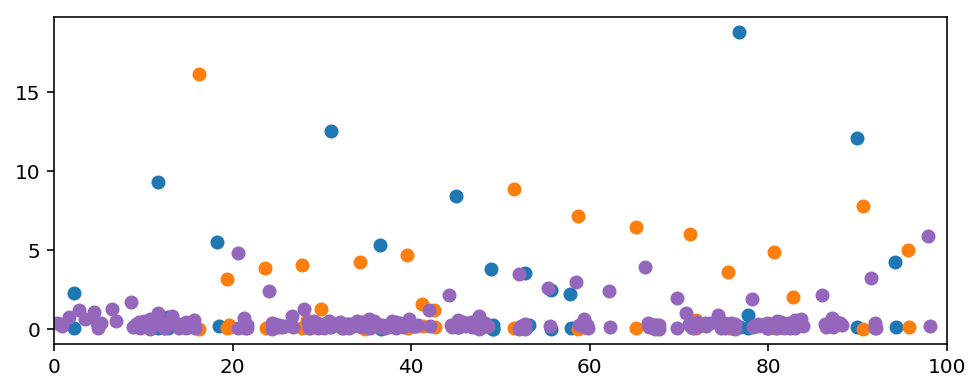

In [81]:
for row in somevectors.itertuples():
    plt.plot(row.vectime[1:], diff(row.vectime), 'o')
plt.xlim(0, 100)
plt.show()

We now know enough NumPy to be able to write a function that computes running average (a.k.a. "mean filter"). Let's try it out in a plot immediately.

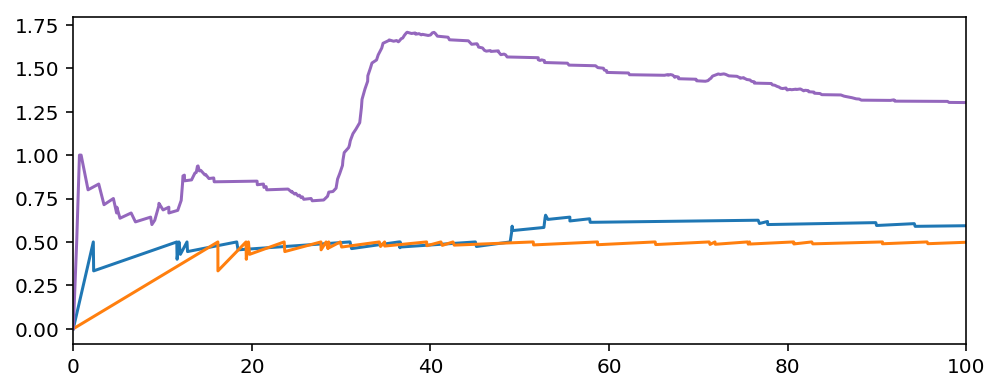

In [83]:
def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

# example plot:
for row in somevectors.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0, 100)
plt.show()

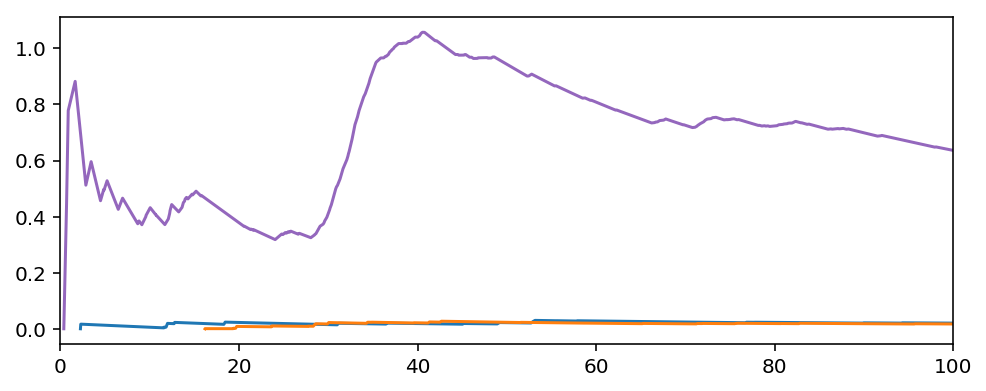

In [84]:
def running_timeavg(t, x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt) / t[1:]

# example plot:
for row in somevectors.itertuples():
    plt.plot(row.vectime[1:], running_timeavg(row.vectime, row.vecvalue))
plt.xlim(0, 100)
plt.show()

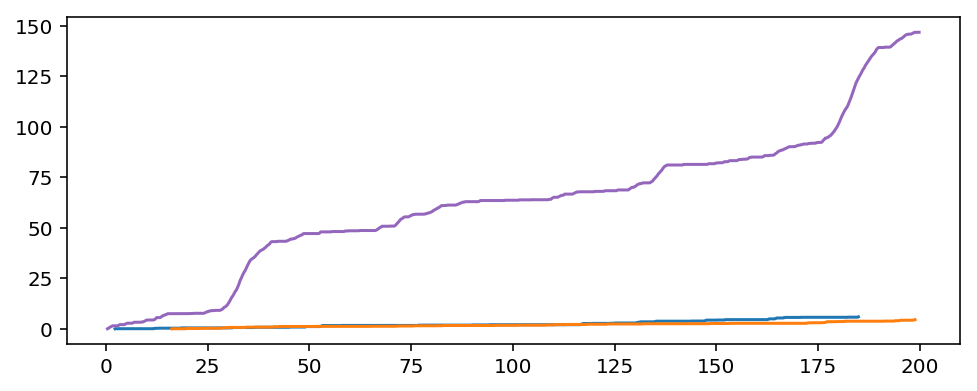

In [85]:
def integrate_steps(t, x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt)

for row in somevectors.itertuples():
    plt.plot(row.vectime[1:], integrate_steps(row.vectime, row.vecvalue))
plt.show()

As the last example in this section, here is a function that computes moving window average. It relies on the clever trick of subtracting the cumulative sum of the original vector from its shifted version to get the sum of values in every *N*-sized window.

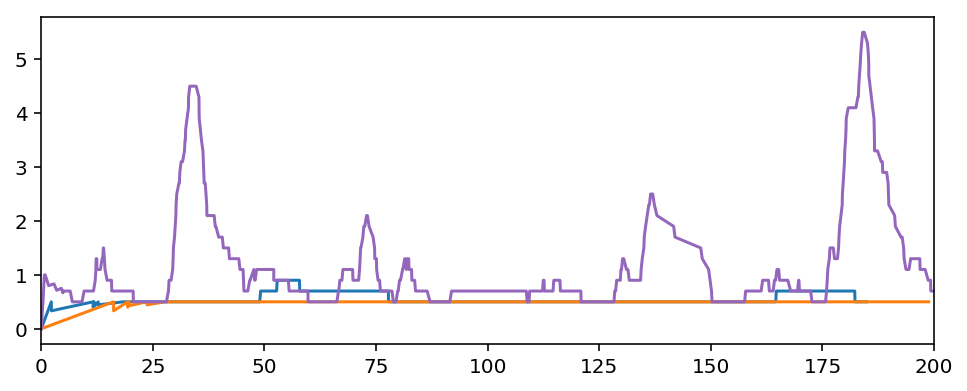

In [86]:
def winavg(x, N):
    xpad = np.concatenate((np.zeros(N), x))
    s = np.cumsum(xpad)
    ss = s[N:] - s[:-N]
    ss[N-1:] /= N
    ss[:N-1] /= np.arange(1, min(N-1, ss.size)+1)
    return ss

# example:
for row in somevectors.itertuples():
    plt.plot(row.vectime, winavg(row.vecvalue, 10))
plt.xlim(0, 200)
plt.show()

You can find further hints for smoothing the plot of an output vector in the signal processing chapter of the SciPy Cookbook (see References).

## Resources

The primary and authentic source of information on Pandas, Matplotlib and other libraries is their official documentation. I do not link them here because they are trivial to find via Google. Instead, here is a random collection of other resources that I found useful while writing this tutorial (not counting all the StackOverflow pages I visited.)

- Pandas tutorial from Greg Reda: http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/
- On reshaping data frames: https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping
- Matplotlib tutorial of Nicolas P. Rougier: https://www.labri.fr/perso/nrougier/teaching/matplotlib/
- Creating boxplots with Matplotlib, from Bharat Bhole: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
- SciPy Cookbook on signal smoothing: http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
- Visual Guide on Pandas (video): https://www.youtube.com/watch?v=9d5-Ti6onew
- Python Pandas Cookbook (videos): https://www.youtube.com/playlist?list=PLyBBc46Y6aAz54aOUgKXXyTcEmpMisAq3
